# 220968280 - Anirudh Swaminathan - DSE A2

## Week 4 - Exercise 2 - KNN algorithm on iris dataset using sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Dataset
### 2. Rename columns
### 3. Drop redundant columns

In [2]:
df = pd.read_csv('datasets//Iris.csv')
df = df.drop('Id', axis=1)
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(species_map)
df = df.dropna(axis=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 4. View the summary of the dataset

In [3]:
df.drop('Species', axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 7. Check data types of columns of data frame

In [4]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

### 9. Check the distribution of variables using histograms

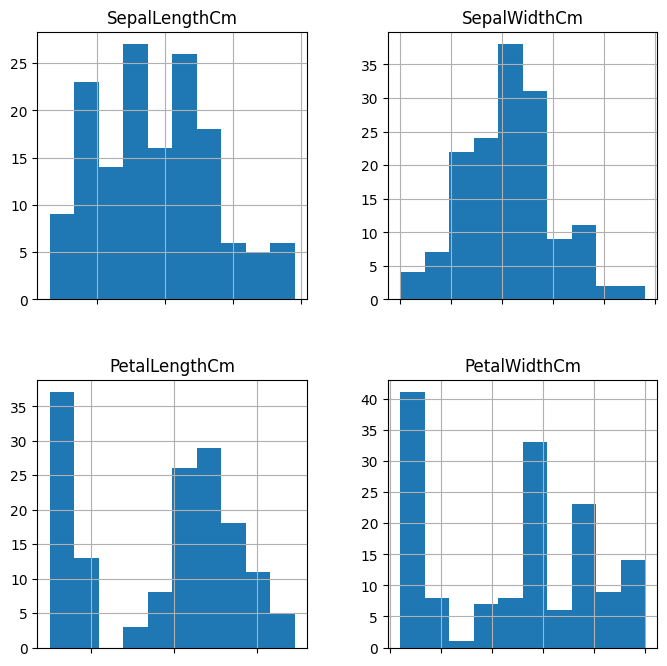

In [5]:
fig, axis = plt.subplots(2,2,figsize=(8, 8))
df.drop('Species', axis=1).hist(ax=axis)
for ax in fig.axes:
    ax.set_xticklabels([])

plt.show()

### 10. Estimate correlation coefficients and represent using heatmaps

<Axes: >

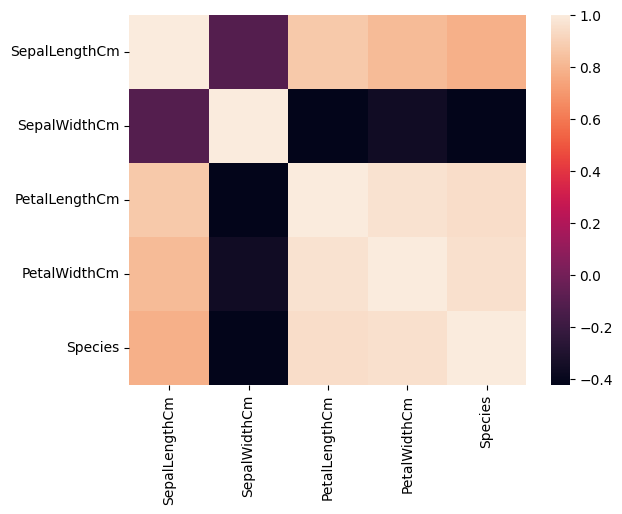

In [6]:
sns.heatmap(df.corr())

### 11. Declare feature vector and target variable

In [7]:
X = df.drop('Species', axis=1)
Y = df['Species']

### 12. Split data into separate training and test set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 13. Perform Feature Scaling(Normalize)

In [9]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [10]:
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

### 14. Fit the K Neighbours Classifier to the training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 15. Predict test-set results 
### 16. Check the accuracy score 
### 17. Compare the train-set and test-set accuracy

In [13]:
y_pred = knn.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy of train set:", accuracy)

Accuracy of train set: 0.9833333333333333


In [14]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of test set:", accuracy)

Accuracy of test set: 0.9666666666666667


### 20. Display confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


### 21. Generate classification report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 22. Evaluate classification error

In [17]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
error = (FP+FN)/(TP+FP+FN+TN)
print(f'classification error: {error[0]}')

classification error: 0.0


### 24. Perform k-fold validation

In [20]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
kfold = KFold(n_splits=10)
scores = cross_val_score(knn, x, y, cv=kfold)
for i in range(len(scores)):
    print(f"Fold {i+1}: {scores[i]}")
print(f"Average accuracy: {scores.mean()}")

Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 0.8666666666666667
Fold 5: 0.8666666666666667
Fold 6: 1.0
Fold 7: 1.0
Fold 8: 1.0
Fold 9: 1.0
Fold 10: 0.9333333333333333
Average accuracy: 0.9666666666666668


### 18. Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)
### 19. Tabulate the results using the Tabulate package

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from tabulate import tabulate
k_values = range(3, 10)
splits = [0.3, 0.25, 0.2]
results = pd.DataFrame(columns=['k', 'Train-Test Split', 'Precision', 'Recall', 'F1-score', 'Accuracy'])
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        iteration_results = pd.DataFrame({'k': [k], 'Train-Test Split': [split], 'Precision': [precision], 'Recall': [recall], 'F1-score': [f1], 'Accuracy': [accuracy]})
        results = pd.concat([results, iteration_results], ignore_index=True)
results = results.sort_values(by='k')
print(tabulate(results, headers='keys', tablefmt='psql', showindex=False))


C:\Users\s_ani\AppData\Local\Temp\ipykernel_21084\3439287022.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, iteration_results], ignore_index=True)


+-----+--------------------+-------------+----------+------------+------------+
|   k |   Train-Test Split |   Precision |   Recall |   F1-score |   Accuracy |
|-----+--------------------+-------------+----------+------------+------------|
|   3 |               0.3  |    1        | 1        |   1        |   1        |
|   3 |               0.2  |    1        | 1        |   1        |   1        |
|   3 |               0.25 |    1        | 1        |   1        |   1        |
|   4 |               0.3  |    1        | 1        |   1        |   1        |
|   4 |               0.2  |    1        | 1        |   1        |   1        |
|   4 |               0.25 |    1        | 1        |   1        |   1        |
|   5 |               0.3  |    1        | 1        |   1        |   1        |
|   5 |               0.2  |    1        | 1        |   1        |   1        |
|   5 |               0.25 |    1        | 1        |   1        |   1        |
|   6 |               0.2  |    1       